# Problem Definition


- ### Write your Assignment 3 again such that:
- Finally after 4 code iterations achieve:
- 99.4% accuracy
- Less than 15k Parameters
- Have started from a Vanilla network (no BN, DropOut, LR, larger batch size, change in Optimizer, etc)
- Make sure you are tracking your code's performance, and writing down your observations are you achieve better or worse results
- Your second code can only have max 2 improvements over first one, third can have only max 2 over second and so on. 
- All of your iterations are in different CODE BLOCKS and named properly like First CODE, Second CODE, etc
- All of your iterations have a Header note, describing what all you are planning to do in this code
- All of your code is very well documented
- There is a readme file (or embedded documentation) describing your codes and steps you've taken
- This is a slightly time-consuming assignment, please make sure you start early. 
- 200 points on your code and Documentation, and 200 points on your ReadMe File or Documentation. (Subtractions in case your readme or documentation does not have proper formatting and does not look formal/professional)
You are submitting 1 file with 4 codes (and a readme if you do not want to comment directly in the file)

  
  

## Target:Finally after 4 code iterations achieve-99.4% accuracy, Less than 15k Parameters

### First Code - Vanilla network (no BN, DropOut, LR, larger batch size, change in Optimizer, etc)

Mounted at /content/drive
(60000, 28, 28)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 32)        4608      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 16)          4608      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_29 (C

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 18s 308us/step - loss: 1.0715 - acc: 0.6571 - val_loss: 0.9787 - val_acc: 0.6854
Epoch 2/50
60000/60000 [==============================] - 18s 302us/step - loss: 0.9782 - acc: 0.6865 - val_loss: 0.9523 - val_acc: 0.6900
Epoch 3/50
60000/60000 [==============================] - 18s 298us/step - loss: 0.9605 - acc: 0.6901 - val_loss: 0.9485 - val_acc: 0.6905
Epoch 4/50
60000/60000 [==============================] - 18s 298us/step - loss: 0.9534 - acc: 0.6920 - val_loss: 0.9491 - val_acc: 0.6933
Epoch 5/50
60000/60000 [==============================] - 18s 298us/step - loss: 0.9473 - acc: 0.6942 - val_loss: 0.9511 - val_acc: 0.6917
Epoch 6/50
60000/60000 [==============================] - 18s 303us/step - loss: 0.9442 - acc: 0.6947 - val_loss: 0.9500 - val_acc: 0.6947
Epoch 7/50
60000/60000 [==============================] - 18s 299us/step - loss: 0.9402 - acc: 0.6949 - val_loss: 0.

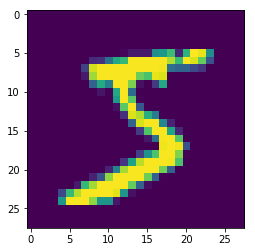

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment4')

# https://keras.io/
# !pip install -q keras
# import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


from keras.layers import Activation, Conv2D, MaxPooling2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False, input_shape=(28,28,1)))  #26
model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False))     # 24
model.add(Conv2D(32, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))      # 11, 11 
model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(Conv2D(10, (2,2), activation='relu',use_bias=False))          # 12x12, 10 layers

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1 , validation_data=(X_test, Y_test))

## First Code: Observation:

#### *How much of the Target is Achieved?*
- Parameters has been reduced under 15K


#### *Observation:*
- The model is underfitting. 
- The train accuracy is low and validation accuracy is also low.
- This model will not be able to predict the hand written digits properly.


## Second Code: Increase Batch Size

Mounted at /content/drive
(60000, 28, 28)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 22, 22, 32)        4608      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 9, 9, 16)          4608      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_59 (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.6292 - acc: 0.7970 - val_loss: 0.3518 - val_acc: 0.8741
Epoch 2/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.3418 - acc: 0.8747 - val_loss: 0.3253 - val_acc: 0.8800
Epoch 3/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.3110 - acc: 0.8819 - val_loss: 0.2928 - val_acc: 0.8876
Epoch 4/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.2947 - acc: 0.8856 - val_loss: 0.2832 - val_acc: 0.8888
Epoch 5/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.2848 - acc: 0.8880 - val_loss: 0.2806 - val_acc: 0.8892
Epoch 6/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.2785 - acc: 0.8893 - val_loss: 0.2698 - val_acc: 0.8906
Epoch 7/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.2727 - acc: 0.8903 - val_loss: 0.2698 - 

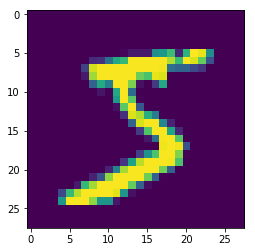

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment4')

# https://keras.io/
# !pip install -q keras
# import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


from keras.layers import Activation, Conv2D, MaxPooling2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False, input_shape=(28,28,1)))  #26
model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False))     # 24
model.add(Conv2D(32, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))      # 11, 11 
model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(Conv2D(10, (2,2), activation='relu',use_bias=False))          # 12x12, 10 layers

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, nb_epoch=50, verbose=1 , validation_data=(X_test, Y_test))

## Second Code : Observation:-

- The accuracy increased from 69 to 89
- sending more images per batch has made the model to learn better.

## Third Code: Add Batchnormalization to the second code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(60000, 28, 28)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 22, 22, 32)        4608      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 11, 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 170us/step - loss: 0.3069 - acc: 0.9205 - val_loss: 0.0844 - val_acc: 0.9747
Epoch 2/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0636 - acc: 0.9823 - val_loss: 0.0553 - val_acc: 0.9818
Epoch 3/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.0439 - acc: 0.9874 - val_loss: 0.0538 - val_acc: 0.9825
Epoch 4/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.0352 - acc: 0.9894 - val_loss: 0.0560 - val_acc: 0.9817
Epoch 5/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.0296 - acc: 0.9910 - val_loss: 0.0405 - val_acc: 0.9869
Epoch 6/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.0245 - acc: 0.9925 - val_loss: 0.0416 - val_acc: 0.9870
Epoch 7/50
60000/60000 [==============================] - 8s 129us/step - loss: 0.0220 - acc: 0.9930 - val_loss: 0.0369 -

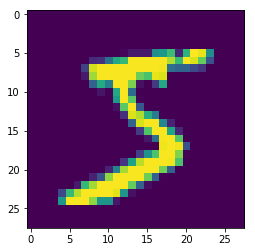

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment4')

# https://keras.io/
# !pip install -q keras
# import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


from keras.layers import Activation, Conv2D, MaxPooling2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False, input_shape=(28,28,1)))  #26
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False))     # 24
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))      # 11, 11 
model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(BatchNormalization())
model.add(Conv2D(10, (2,2), activation='relu',use_bias=False))          # 12x12, 10 layers

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, nb_epoch=50, verbose=1 , validation_data=(X_test, Y_test))

## Third Code : Observation:-

- By normalizing the data batchwise has helped the model to learn important features at feature level and there by accuracy increased.

## Fourth Code: Add Dropout and LearningRate

Mounted at /content/drive
(60000, 28, 28)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_75 (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 13s 212us/step - loss: 0.4454 - acc: 0.8763 - val_loss: 0.1055 - val_acc: 0.9693
Epoch 2/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.0921 - acc: 0.9737 - val_loss: 0.0601 - val_acc: 0.9828
Epoch 3/50
60000/60000 [==============================] - 9s 151us/step - loss: 0.0650 - acc: 0.9809 - val_loss: 0.0537 - val_acc: 0.9831
Epoch 4/50
60000/60000 [==============================] - 9s 151us/step - loss: 0.0535 - acc: 0.9842 - val_loss: 0.0536 - val_acc: 0.9826
Epoch 5/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.0451 - acc: 0.9860 - val_loss: 0.0379 - val_acc: 0.9886
Epoch 6/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.0418 - acc: 0.9867 - val_loss: 0.0354 - val_acc: 0.9887
Epoch 7/50
60000/60000 [==============================] - 9s 154us/step - loss: 0.0370 - acc: 0.9885 - val_loss: 0.0322 -

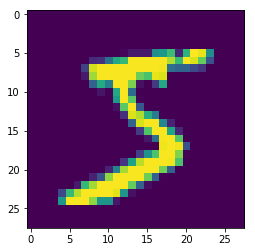

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment4')

# https://keras.io/
# !pip install -q keras
# import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


from keras.layers import Activation, Conv2D, MaxPooling2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False, input_shape=(28,28,1)))  #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False))     # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))      # 11, 11 

model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(10, (2,2), activation='relu',use_bias=False))          # 12x12, 10 layers

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, nb_epoch=50, verbose=1 , validation_data=(X_test, Y_test))

In [0]:
model.save_weights('weights_code4_50epoch.h5')

In [0]:

model.load_weights('weights_code4_50epoch.h5')


from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 227us/step - loss: 0.0242 - acc: 0.9921 - val_loss: 0.0402 - val_acc: 0.9880
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 9s 154us/step - loss: 0.0177 - acc: 0.9942 - val_loss: 0.0307 - val_acc: 0.9917
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 9s 156us/step - loss: 0.0133 - acc: 0.9954 - val_loss: 0.0342 - val_acc: 0.9913
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 9s 152us/step - loss: 0.0097 - acc: 0.9965 - val_loss: 0.0207 - val_acc: 0.9942
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [0]:
model.save_weights('weights_code4_100epoch_acc_99.4.h5')

## Fourth Code : Observation:-

- by reducing the learning rate the model learns slowly and there is chance that the weights would be modified at decimal values based on the learning rate and there by accuracy increases